In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve
)

import joblib

## 1. Подготовительная работа

### 1.1. Загрузка и осмотр данных

In [3]:
sessions = pd.read_csv('data/ga_sessions.csv')
hits = pd.read_csv('data/ga_hits.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_15348\258398227.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  sessions = pd.read_csv('data/ga_sessions.csv')


In [4]:
print(f"ga_sessions: {sessions.shape}")
sessions.head()

ga_sessions: (1860042, 18)


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [5]:
print(f"ga_hits: {hits.shape}")
hits.head()

ga_hits: (15726470, 11)


,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


### 1.2. Оценка полноты и чистоты данных 

In [6]:
print("Пропуски в ga_sessions в процентах:")
missing_values_sessions = ((sessions.isna().sum() / len(sessions)) * 100).sort_values(ascending=False)
missing_values_sessions

Пропуски в ga_sessions в процентах:


device_model                99.121633
utm_keyword                 58.174009
device_os                   57.533002
device_brand                19.740307
utm_adcontent               18.043410
utm_campaign                11.806346
utm_source                   0.005215
session_id                   0.000000
client_id                    0.000000
visit_number                 0.000000
utm_medium                   0.000000
visit_date                   0.000000
visit_time                   0.000000
device_category              0.000000
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
dtype: float64

In [7]:
print("Пропуски в ga_hits в процентах:")
missing_values_hits = ((hits.isna().sum() / len(hits)) * 100).sort_values(ascending=False)
missing_values_hits

Пропуски в ga_hits в процентах:


event_value       100.000000
hit_time           58.247795
hit_referer        39.899634
event_label        23.909905
session_id          0.000000
hit_date            0.000000
hit_number          0.000000
hit_page_path       0.000000
hit_type            0.000000
event_action        0.000000
event_category      0.000000
dtype: float64

In [8]:
print(f"Дубликаты в sessions: {sessions.duplicated().sum()}")
print(f"Дубликаты в hits: {hits.duplicated().sum()}")

Дубликаты в sessions: 0
Дубликаты в hits: 0


In [9]:
print(f"\Проверка уникальности session_id в sessions: {sessions['session_id'].is_unique}")

\Проверка уникальности session_id в sessions: True


In [10]:
print(f"\nУникальных session_id в sessions: {sessions['session_id'].nunique()}")
print(f"Уникальных session_id в hits: {hits['session_id'].nunique()}")
print(f"В среднем событий на сессию: {len(hits) / hits['session_id'].nunique():.1f}")


Уникальных session_id в sessions: 1860042
Уникальных session_id в hits: 1734610
В среднем событий на сессию: 9.1


In [11]:
hits.dtypes

session_id         object
hit_date           object
hit_time          float64
hit_number          int64
hit_type           object
hit_referer        object
hit_page_path      object
event_category     object
event_action       object
event_label        object
event_value       float64
dtype: object

In [12]:
sessions.dtypes

session_id                  object
client_id                   object
visit_date                  object
visit_time                  object
visit_number                 int64
utm_source                  object
utm_medium                  object
utm_campaign                object
utm_adcontent               object
utm_keyword                 object
device_category             object
device_os                   object
device_brand                object
device_model                object
device_screen_resolution    object
device_browser              object
geo_country                 object
geo_city                    object
dtype: object

### 1.3. Создание целевой переменной и объединение таблиц

In [13]:
# Определяем целевые действия
target_actions = [
    'sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click',
    'sub_custom_question_submit_click', 'sub_call_number_click', 'sub_callback_submit_click',
    'sub_submit_success', 'sub_car_request_submit_click' 
]

In [14]:
# Заполняем event_value: 1 для целевых действий, 0 для остальных
hits['event_value'] = hits['event_action'].isin(target_actions).astype(int)

In [15]:
print("event_value заполнен:")
print(f"Распределение: {hits['event_value'].value_counts().to_dict()}")

event_value заполнен:
Распределение: {0: 15621562, 1: 104908}


In [16]:
# Создаем целевую переменную на уровне сессий
session_target = hits.groupby('session_id')['event_value'].max().reset_index()
session_target.columns = ['session_id', 'target']

In [17]:
ml_data = sessions.merge(session_target, on='session_id', how='left')

In [18]:
print("Таблицы объединены:")
print(f"Размер ml_data: {ml_data.shape}")
print(f"Конверсия в объединенных данных: {ml_data['target'].mean():.3f}")

Таблицы объединены:
Размер ml_data: (1860042, 19)
Конверсия в объединенных данных: 0.029


In [19]:
# Заполняем пропуски нулями
ml_data['target'] = ml_data['target'].fillna(0)

In [20]:
current_dtype = ml_data['target'].dtype
print(f"Текущий тип target: {current_dtype}")

Текущий тип target: float64


In [21]:
# Меняем тип данных целевой переменной на целочисленный
ml_data['target'] = ml_data['target'].astype('int64')
print(f"Новый тип: {ml_data['target'].dtype}")

Новый тип: int64


### 1.4. Сохраняем объединенный датафрейм

In [22]:
# Сохраняем объединенные данные для пайплайна
ml_data.to_csv('data/merged_sessions.csv', index=False)
print("Файл merged_sessions.csv сохранен")

Файл merged_sessions.csv сохранен


### 1.5. Приведение данных в нормальный вид

In [23]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 19 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
 18  target                    int64 
dtypes: int64(2), object(17)
memory usage: 269.6+ MB


In [24]:
# Преобразование полей времени и даты в нужные типы данных 
ml_data['visit_date'] = pd.to_datetime(ml_data['visit_date'], utc=True)
ml_data['visit_time'] = pd.to_timedelta(ml_data['visit_time'])

In [25]:
ml_data.dtypes

session_id                               object
client_id                                object
visit_date                  datetime64[ns, UTC]
visit_time                      timedelta64[ns]
visit_number                              int64
utm_source                               object
utm_medium                               object
utm_campaign                             object
utm_adcontent                            object
utm_keyword                              object
device_category                          object
device_os                                object
device_brand                             object
device_model                             object
device_screen_resolution                 object
device_browser                           object
geo_country                              object
geo_city                                 object
target                                    int64
dtype: object

## 2. Разведочный анализ данных 

### 2.1. Обработка пропущенных значений

#### 2.1.1. Обработка пропусков в "device_model" 

In [26]:
ml_data.device_model.isna().sum() / len(ml_data) * 100

np.float64(99.12163273732529)

In [27]:
ml_data.device_model.value_counts(dropna=False)

device_model
NaN                     1843704
AuMdmADEIoPXiWpTsBEj       9778
tWBQlsvNfHxRUjaPAfhd        653
cwMJxNXiWUgMUxGiCTPs        651
pTgAEPipQxDXCjPrJbHo        461
                         ...   
UvyzWsKbojrmlVrFRIgp          1
MbollXMuOxfwxhQmvVNl          1
mhkBNBhsTwAvDUZdstnC          1
bTXLctmbbOJCWJiZDqSP          1
vybTbTvsqxkeqykOdEPH          1
Name: count, Length: 105, dtype: int64

In [28]:
ml_data.device_model.describe()

count                    16338
unique                     104
top       AuMdmADEIoPXiWpTsBEj
freq                      9778
Name: device_model, dtype: object

In [29]:
ml_data[ml_data['device_model'].notnull()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
62,9055656589238457290.1635504877.1635504877,2108434352.16355,2021-10-29 00:00:00+00:00,0 days 13:54:37,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Meizu,qBRdfuuhOnnqwSqNiPOv,360x744,Chrome,Russia,Moscow,0
65,905565998839028208.1635310063.1635310063,210843514.163531,2021-10-27 00:00:00+00:00,0 days 07:47:43,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,OnePlus,AshpvdJdReafUzEMmWGr,384x832,Android Webview,Russia,Saint Petersburg,0
66,905565998839028208.1636951969.1636951969,210843514.163531,2021-11-15 00:00:00+00:00,0 days 07:52:49,2,ISrKoXQCxqqYvAZICvjs,smm,NaN,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,OnePlus,AshpvdJdReafUzEMmWGr,384x832,Android Webview,Russia,Saint Petersburg,0
165,9056202067269505745.1640092368.1640092368,2108561356.164009,2021-12-21 00:00:00+00:00,0 days 16:12:48,1,ZpYIoDJMcFzVoPFsHGJL,push,sbJRYgVfvcnqKJNDDYIr,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,384x854,Chrome,Russia,Moscow,0
208,9056422519349747445.1638964982.1638964982,2108612684.163896,2021-12-08 00:00:00+00:00,0 days 15:03:02,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,RrhnkuoaqckNtJpAZDzH,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,320x640,Chrome,Russia,Saint Petersburg,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859362,9052676375860711226.1639943995.1639943995,2107740467.163994,2021-12-19 00:00:00+00:00,0 days 22:59:55,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,393x873,Chrome,Russia,Izhevsk,0
1859404,9052904464392788371.1638799763.1638799763,2107793573.16388,2021-12-06 00:00:00+00:00,0 days 17:09:23,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Nokia,aCLaTVQlHcXbUnQYQvIg,412x892,Chrome,Russia,Novosibirsk,0
1859535,9053425229175288131.1636659526.1636659526,2107914823.163666,2021-11-11 00:00:00+00:00,0 days 22:38:46,1,faqsogjxCvbseFqupueU,banner,dZqEgyoxhtbeLFMtnnVR,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,385x769,Chrome,Russia,Samara,0
1859612,9053730012943175107.1640761072.1640761072,2107985786.164032,2021-12-29 00:00:00+00:00,0 days 09:57:52,2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,360x760,Chrome,Russia,Vladivostok,0


In [30]:
# удаляем признак, так как пропусков больше 99%
ml_data = ml_data.drop('device_model', axis=1)
ml_data.shape

(1860042, 18)

#### 2.1.2. Обработка пропусков в "utm_keyword "

In [31]:
ml_data.utm_keyword.isna().sum() / len(ml_data) * 100

np.float64(58.17400897399091)

In [32]:
ml_data.utm_keyword.value_counts(dropna=False)

utm_keyword
NaN                     1082061
puhZPIYqKXeFPaUviSjo     506819
aXQzDWsJuGXeBXexNHjc      24241
pHqgLcdBQPSLcrTpLkdr      13767
ITfrGJNwVsHBGJMAKoct      13353
                         ...   
nGFPxtyrBsOYBtJhrWEk          1
iujgEupxJZhqFyayoKpL          1
nSwtoJNvOztCnprKMSIM          1
TkzfDRIBKntFdWkzUePd          1
pPFwanAwnMLEswxIGTmI          1
Name: count, Length: 1220, dtype: int64

In [33]:
# удаляем признак, так как он имеет много пропусков и много уникальнрых значений
ml_data = ml_data.drop('utm_keyword', axis = 1)
ml_data.shape

(1860042, 17)

#### 2.1.3. Обработка пропусков в "device_os"

In [34]:
ml_data.device_os.isna().sum() / len(ml_data) * 100

np.float64(57.53300194296688)

In [35]:
ml_data.device_os.value_counts(dropna=False)

device_os
NaN              1070138
Android           464054
iOS               207104
Windows            88307
Macintosh          24824
Linux               5120
(not set)            364
Chrome OS             83
BlackBerry            27
Tizen                  7
Samsung                4
Windows Phone          4
Firefox OS             3
Nokia                  3
Name: count, dtype: int64

In [36]:
# Смотрим распределение ОС по типам устройств
ml_data.device_category.value_counts(dropna=False)

device_category
mobile     1474871
desktop     366863
tablet       18308
Name: count, dtype: int64

In [37]:
# Для мобильных устройств
mobile_os = ml_data[ml_data.device_category == 'mobile']['device_os'].value_counts()
print(mobile_os.head(10))

device_os
Android          459192
iOS              205256
Linux                50
BlackBerry           27
(not set)            20
Windows              16
Macintosh            10
Tizen                 5
Windows Phone         4
Samsung               4
Name: count, dtype: int64


In [38]:
# Для компьютеров
desktop_os = ml_data[ml_data.device_category == 'desktop']['device_os'].value_counts()  
print(desktop_os.head(10))

device_os
Windows      88291
Macintosh    24804
Linux         5063
(not set)      344
Chrome OS       83
iOS             33
Android         20
Tizen            2
Name: count, dtype: int64


In [39]:
# Для планшетов
tablet_os = ml_data[ml_data.device_category == 'tablet']['device_os'].value_counts()
print(tablet_os.head(10))

device_os
Android      4842
iOS          1815
Macintosh      10
Linux           7
Name: count, dtype: int64


In [40]:
# Заполнение device_os по device_category
mobile_mask = (ml_data.device_category == 'mobile') & (ml_data.device_os.isna())
desktop_mask = (ml_data.device_category == 'desktop') & (ml_data.device_os.isna())  
tablet_mask = (ml_data.device_category == 'tablet') & (ml_data.device_os.isna())

In [41]:
ml_data.loc[mobile_mask, 'device_os'] = 'Android'
ml_data.loc[desktop_mask, 'device_os'] = 'Windows'
ml_data.loc[tablet_mask, 'device_os'] = 'Android'

In [42]:
# Заполнение device_os по device_brand для топ-15 брендов
ml_data.device_brand.value_counts(dropna=False).head(15)

device_brand
Apple        551088
NaN          367178
Samsung      332194
Xiaomi       288367
Huawei       185853
Realme        19058
(not set)     17545
OPPO          13504
Vivo          11740
OnePlus        9965
Asus           7929
Nokia          7285
Sony           6459
ZTE            6365
Google         5150
Name: count, dtype: int64

In [43]:
brand_os_mapping = {
    'Apple': 'iOS',
    'Samsung': 'Android', 
    'Xiaomi': 'Android',
    'Huawei': 'Android',
    'Realme': 'Android',
    'OPPO': 'Android',
    'Vivo': 'Android',
    'OnePlus': 'Android', 
    'Asus': 'Android',
    'Nokia': 'Android',
    'Sony': 'Android',
    'ZTE': 'Android'
}

In [44]:
for brand, correct_os in brand_os_mapping.items():
    brand_mask = ml_data.device_brand == brand
    ml_data.loc[brand_mask, 'device_os'] = correct_os

In [45]:
print(f"Текущие пропуски device_os: {ml_data.device_os.isna().sum()}")

Текущие пропуски device_os: 0


#### 2.1.4. Обработка пропусков в "device_brand"

In [46]:
ml_data.device_brand.isna().sum() / len(sessions) * 100

np.float64(19.740306939305672)

In [47]:
ml_data.device_brand.value_counts(dropna=False).head(15)

device_brand
Apple        551088
NaN          367178
Samsung      332194
Xiaomi       288367
Huawei       185853
Realme        19058
(not set)     17545
OPPO          13504
Vivo          11740
OnePlus        9965
Asus           7929
Nokia          7285
Sony           6459
ZTE            6365
Google         5150
Name: count, dtype: int64

In [48]:
# Заполняем по device_browser
ml_data.device_browser.value_counts(dropna=False)

device_browser
Chrome                              1013436
Safari                               478562
YaBrowser                            133311
Safari (in-app)                       69912
Android Webview                       55369
Samsung Internet                      47309
Opera                                 26817
Firefox                               16588
Edge                                  16065
UC Browser                              871
Android Runtime                         392
Mozilla Compatible Agent                362
[FBAN                                   269
Instagram 208.0.0.32.135 Android        140
Instagram 209.0.0.21.119 Android        111
MRCHROME                                 77
Android Browser                          49
Opera Mini                               45
Puffin                                   45
Internet Explorer                        36
Maxthon                                  31
Android                                  22
Instagram 216.1.0

In [49]:
safari_mask = (ml_data.device_browser == 'Safari') & (ml_data.device_brand.isna())
ml_data.loc[safari_mask, 'device_brand'] = 'Apple'

samsung_mask = (ml_data.device_browser == 'Samsung Internet') & (ml_data.device_brand.isna())
ml_data.loc[samsung_mask, 'device_brand'] = 'Samsung'

In [50]:
ml_data.device_brand.isna().sum() / len(ml_data) * 100

np.float64(17.52110973838225)

In [51]:
# Остальное заполняем unknown
ml_data.device_brand = ml_data.device_brand.fillna('unknown')
ml_data.device_brand.isna().sum() / len(sessions) * 100

np.float64(0.0)

#### 2.1.5. Обработка пропусков в utm_adcontent	

In [52]:
ml_data.utm_adcontent.isna().sum() / len(ml_data) * 100

np.float64(18.043409772467502)

In [53]:
ml_data.utm_adcontent.value_counts(dropna=False)

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    1006599
NaN                      335615
vCIpmpaGBnIQhyYNkXqp     181048
xhoenQgDQsgfEPYNPwKO     113072
PkybGvWbaqORmxjNunqZ      60316
                         ...   
vxMugcyrQNIxwvOkqILt          1
cQRpDybanXRyHUvzJmgo          1
wDodCPywICvJWGwjXgTp          1
IcLcclbnECGqvCQgOdET          1
oJivRDNIrrOckRBIKOtG          1
Name: count, Length: 287, dtype: int64

In [54]:
# Заполняем значениями other
ml_data.utm_adcontent = ml_data.utm_adcontent.fillna('other')
ml_data.utm_adcontent.isna().sum() / len(ml_data) * 100

np.float64(0.0)

#### 2.1.6. Обработка пропусков в utm_campaign

In [55]:
ml_data.utm_campaign.isna().sum() / len(ml_data) * 100

np.float64(11.806346308309166)

In [56]:
ml_data.utm_campaign.value_counts(dropna=False)

utm_campaign
LTuZkdKfxRGVceoWkVyg    463481
LEoPHuyFvzoNfnzGgfcd    324044
FTjNLDyTrXaWYgZymFkV    247360
NaN                     219603
gecBYcKZCPMcVYdSSzKP    134042
                         ...  
zXjuoqEaPElBnwpSHMpx         1
AdtHYglxfCpTpwZeTAuW         1
mfMzuDnnxZoVzgSxUxeJ         1
TwMQGFwDtGdibAEpQHYs         1
cXxuwXPoQCvAXPHpFcZl         1
Name: count, Length: 413, dtype: int64

In [57]:
# Заполняем значениями other
ml_data.utm_campaign = ml_data.utm_campaign.fillna('other')
ml_data.utm_campaign.isna().sum() / len(ml_data) * 100

np.float64(0.0)

#### 2.1.7. Обработка пропусков в utm_source

In [58]:
ml_data.utm_source.isna().sum() / len(ml_data) * 100

np.float64(0.0052149360068213515)

In [59]:
ml_data.utm_source.value_counts(dropna=False)

utm_source
ZpYIoDJMcFzVoPFsHGJL    578290
fDLlAcSmythWSCVMvqvL    300575
kjsLglQLzykiRbcDiGcD    266354
MvfHsxITijuriZxsqZqt    186199
BHcvLfOaCWvWTykYqHVe    116320
                         ...  
bZGRDuESNKqbvzmxXlpf         1
jCIRaffxlokbeWIRXHKg         1
oetAUjPZXdyoRrCakDpG         1
SHJidRpqXditMCUeEFzb         1
EiQppLFrUZrUsjXVulLg         1
Name: count, Length: 294, dtype: int64

In [60]:
# заполняем other
ml_data.utm_source = ml_data.utm_source.fillna('not_set')
ml_data.utm_source.isna().sum()

np.int64(0)

In [61]:
missing_values_sessions = ((ml_data.isna().sum() / len(ml_data)) * 100).sort_values(ascending=False)
missing_values_sessions

session_id                  0.0
client_id                   0.0
visit_date                  0.0
visit_time                  0.0
visit_number                0.0
utm_source                  0.0
utm_medium                  0.0
utm_campaign                0.0
utm_adcontent               0.0
device_category             0.0
device_os                   0.0
device_brand                0.0
device_screen_resolution    0.0
device_browser              0.0
geo_country                 0.0
geo_city                    0.0
target                      0.0
dtype: float64

### 2.2. Обработка аномалий

In [62]:
ml_data['visit_number'].describe()

count    1.860042e+06
mean     2.712804e+00
std      1.182907e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.640000e+02
Name: visit_number, dtype: float64

In [63]:
print(ml_data['visit_number'].describe().round(0).astype(int))

count    1860042
mean           3
std           12
min            1
25%            1
50%            1
75%            2
max          564
Name: visit_number, dtype: int64


In [64]:
Q1 = ml_data['visit_number'].quantile(0.25)
Q3 = ml_data['visit_number'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

print(f" IQR граница: {upper_bound}")
print(f" Записей > {upper_bound}: {len(ml_data[ml_data['visit_number'] > upper_bound])}")

 IQR граница: 3.5
 Записей > 3.5: 166969


In [65]:
ml_data.sort_values('visit_number', ascending=False).head(10)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target
1515878,7518333712042258254.1640273759.1640273759,1750498477.162945,2021-12-23 00:00:00+00:00,0 days 18:35:59,564,kjsLglQLzykiRbcDiGcD,cpc,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,desktop,Macintosh,unknown,1920x1080,Chrome,Russia,Moscow,0
1515877,7518333712042258254.1640271352.1640271352,1750498477.162945,2021-12-23 00:00:00+00:00,0 days 17:55:52,563,kjsLglQLzykiRbcDiGcD,cpc,other,other,desktop,Macintosh,unknown,1792x1120,Chrome,Russia,Moscow,0
1515876,7518333712042258254.1640262365.1640262365,1750498477.162945,2021-12-23 00:00:00+00:00,0 days 15:26:05,562,kjsLglQLzykiRbcDiGcD,cpc,other,other,desktop,Macintosh,unknown,1792x1120,Chrome,Russia,Moscow,1
1515875,7518333712042258254.1640258901.1640258901,1750498477.162945,2021-12-23 00:00:00+00:00,0 days 14:28:21,561,kjsLglQLzykiRbcDiGcD,cpc,other,other,desktop,Macintosh,unknown,1792x1120,Chrome,Russia,Moscow,1
1515874,7518333712042258254.1640250093.1640250093,1750498477.162945,2021-12-23 00:00:00+00:00,0 days 12:01:33,560,kjsLglQLzykiRbcDiGcD,cpc,other,other,desktop,Macintosh,unknown,1792x1120,Chrome,Russia,Moscow,0
1515873,7518333712042258254.1640250075.1640250075,1750498477.162945,2021-12-23 00:00:00+00:00,0 days 12:01:15,559,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Macintosh,unknown,1792x1120,Chrome,Russia,Moscow,1
1515872,7518333712042258254.1640250029.1640250029,1750498477.162945,2021-12-23 00:00:00+00:00,0 days 12:00:29,558,kjsLglQLzykiRbcDiGcD,cpc,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,desktop,Macintosh,unknown,1920x1080,Chrome,Russia,Moscow,1
1515871,7518333712042258254.1640246278.1640246278,1750498477.162945,2021-12-23 00:00:00+00:00,0 days 10:57:58,557,RAeIjhqmnmNXpLaHKdgp,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Macintosh,unknown,1792x1120,Chrome,Russia,Moscow,0
1515870,7518333712042258254.1640181970.1640181970,1750498477.162945,2021-12-22 00:00:00+00:00,0 days 17:06:10,556,kjsLglQLzykiRbcDiGcD,cpc,other,other,desktop,Macintosh,unknown,1792x1120,Chrome,Russia,Moscow,1
1515869,7518333712042258254.1640181956.1640181956,1750498477.162945,2021-12-22 00:00:00+00:00,0 days 17:05:56,555,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Macintosh,unknown,1792x1120,Chrome,Russia,Moscow,1


Клиенты, которые часто заходили на сайт, совершали целевые действия. Следовательно это значения не являются аномалиями, поэтому оставляем их.

### 2.3. Анализ зависимостей

In [66]:
# Список ключевых признаков
key_features = [
    'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
    'device_category', 'device_os', 'device_brand',
    'geo_country', 'geo_city'
]

#### 2.3.1. Визуализация распределений ключевых признаков

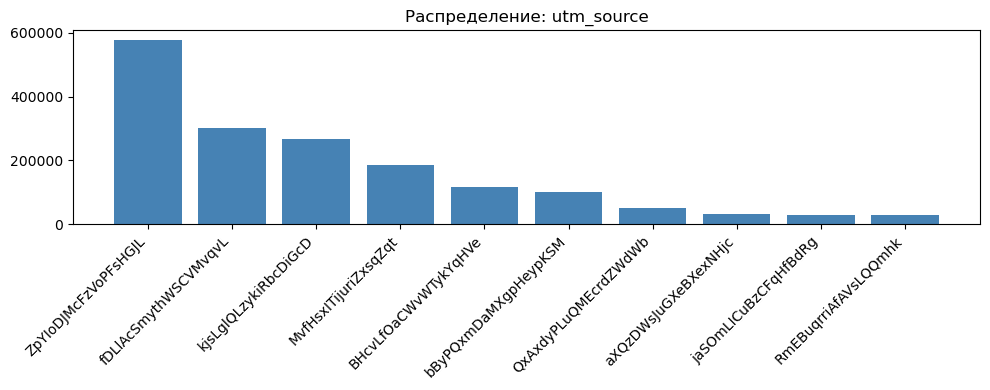

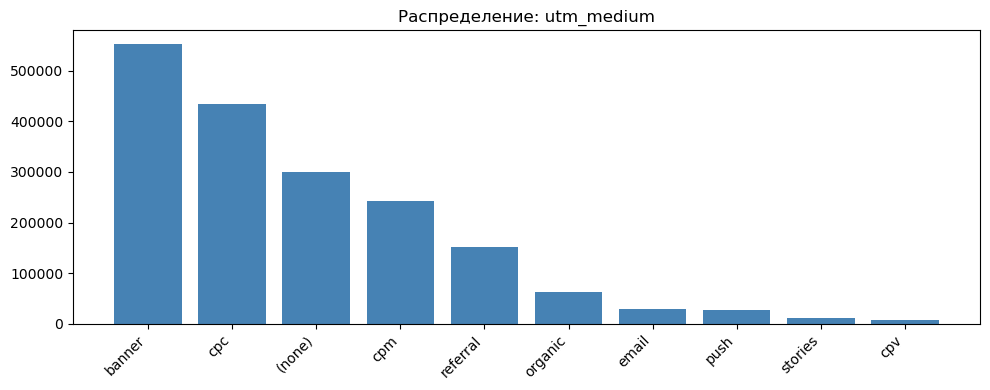

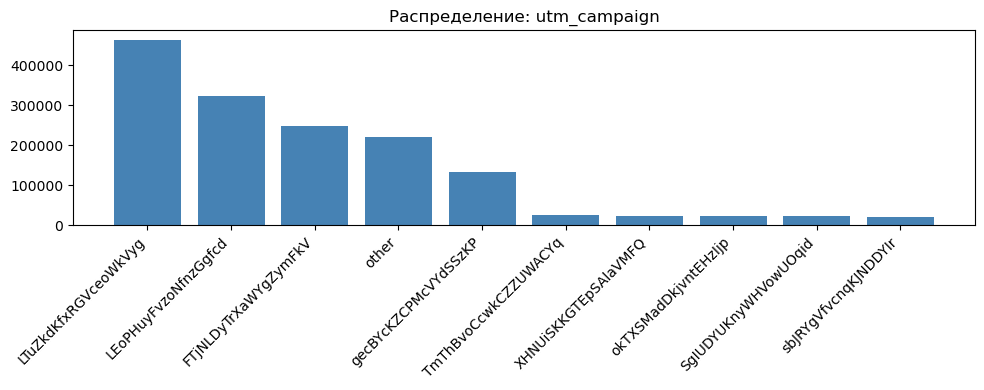

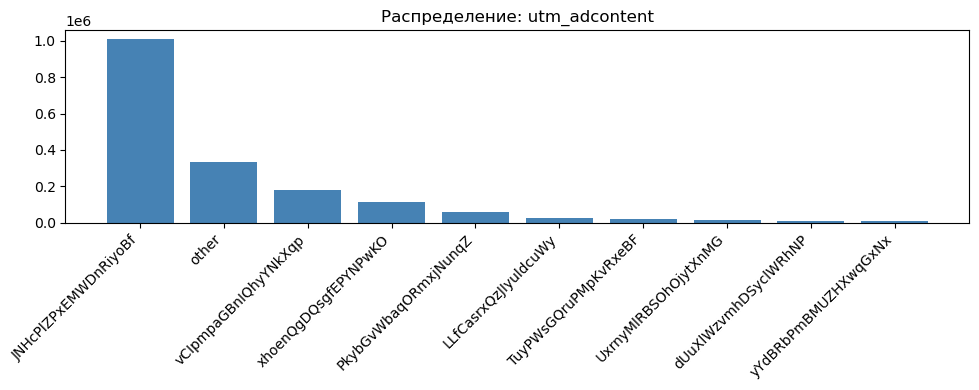

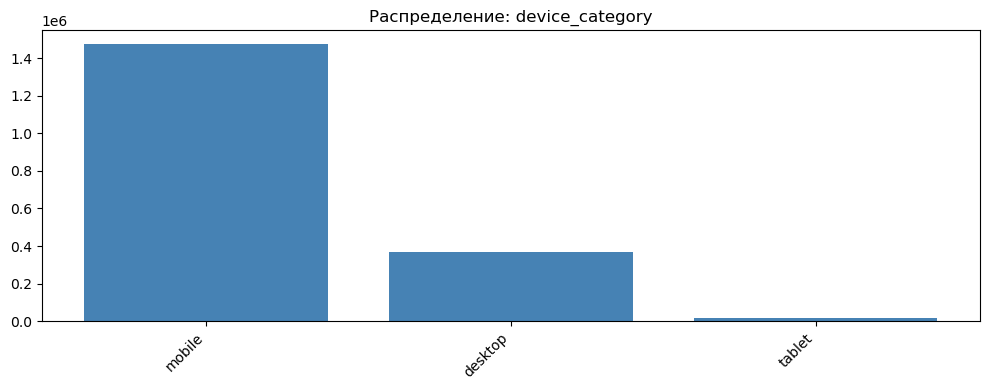

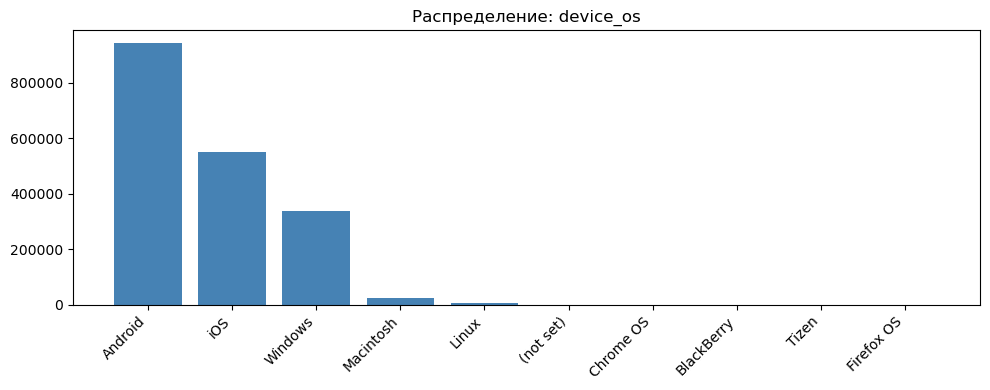

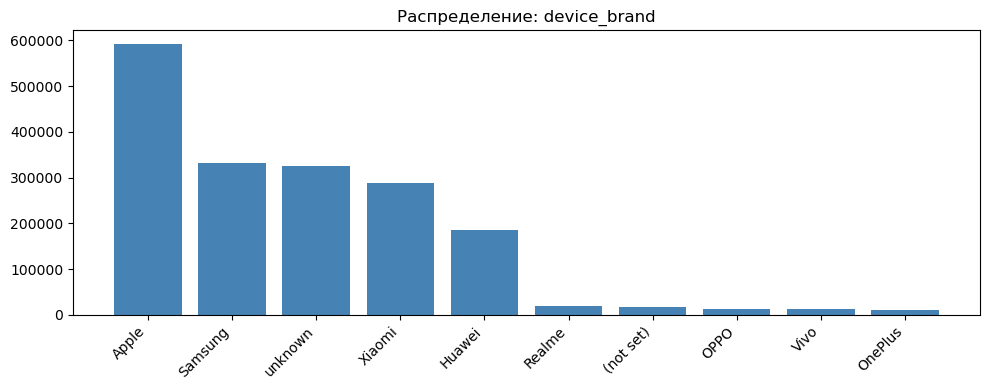

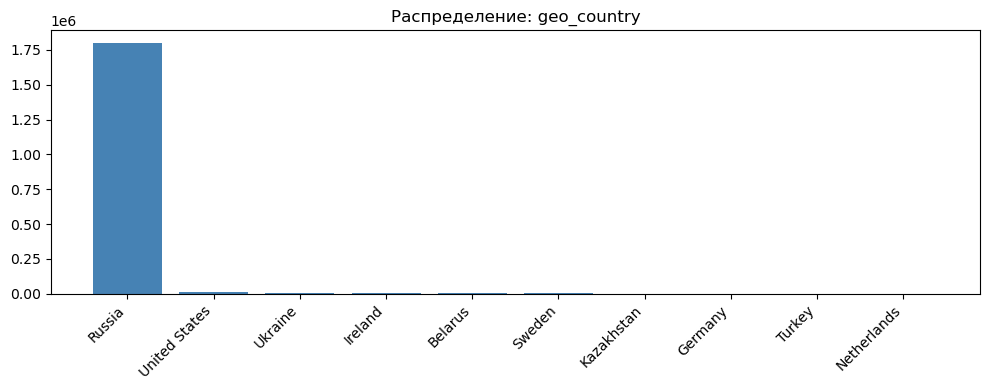

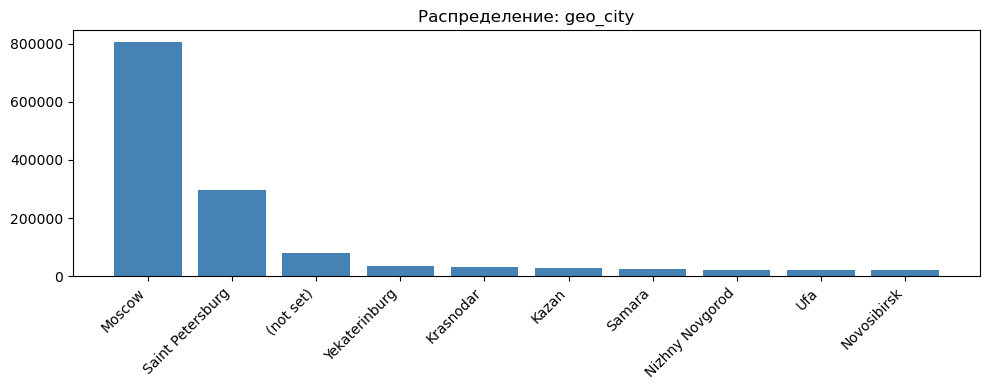

In [67]:
for col in key_features:
    top_vals = ml_data[col].value_counts().head(10)
    
    plt.figure(figsize=(10, 4))
    plt.bar(top_vals.index, top_vals.values, color='steelblue')
    plt.title(f'Распределение: {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#### 2.3.2. Визуализация зависимостей от "target" (CR)

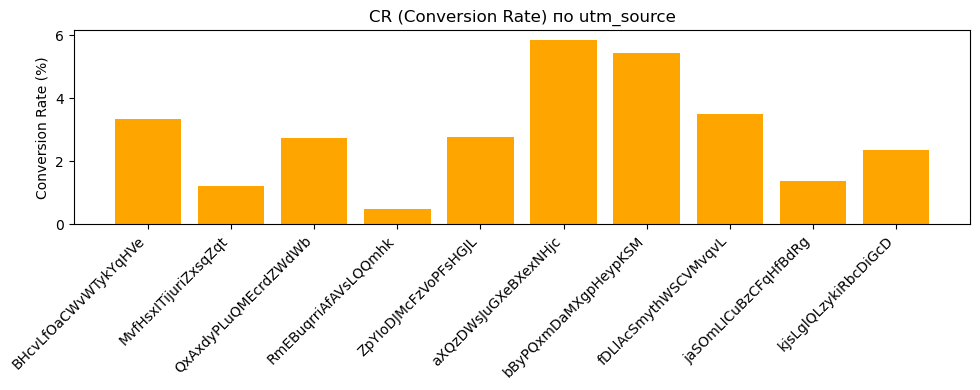

Точные значения CR для utm_source:
  BHcvLfOaCWvWTykYqHVe: 3.337% (3.34%)
  MvfHsxITijuriZxsqZqt: 1.208% (1.21%)
  QxAxdyPLuQMEcrdZWdWb: 2.731% (2.73%)
  RmEBuqrriAfAVsLQQmhk: 0.495% (0.50%)
  ZpYIoDJMcFzVoPFsHGJL: 2.766% (2.77%)
  aXQzDWsJuGXeBXexNHjc: 5.865% (5.86%)
  bByPQxmDaMXgpHeypKSM: 5.433% (5.43%)
  fDLlAcSmythWSCVMvqvL: 3.504% (3.50%)
  jaSOmLICuBzCFqHfBdRg: 1.371% (1.37%)
  kjsLglQLzykiRbcDiGcD: 2.363% (2.36%)


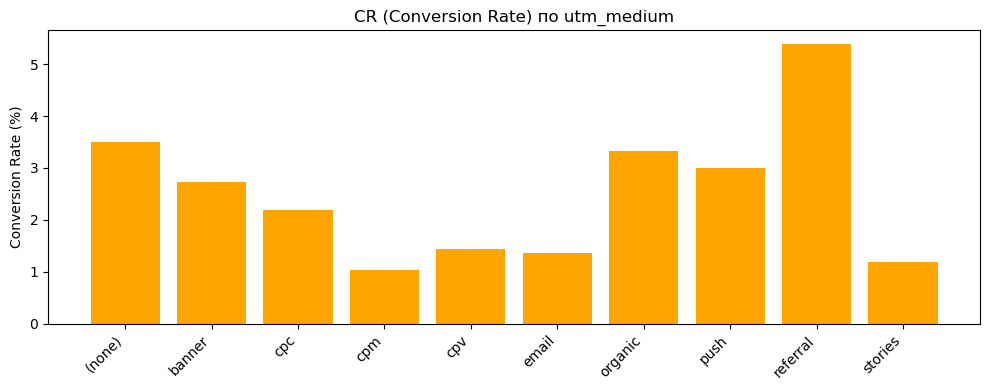

Точные значения CR для utm_medium:
  (none): 3.504% (3.50%)
  banner: 2.735% (2.74%)
  cpc: 2.192% (2.19%)
  cpm: 1.041% (1.04%)
  cpv: 1.434% (1.43%)
  email: 1.371% (1.37%)
  organic: 3.332% (3.33%)
  push: 2.996% (3.00%)
  referral: 5.380% (5.38%)
  stories: 1.191% (1.19%)


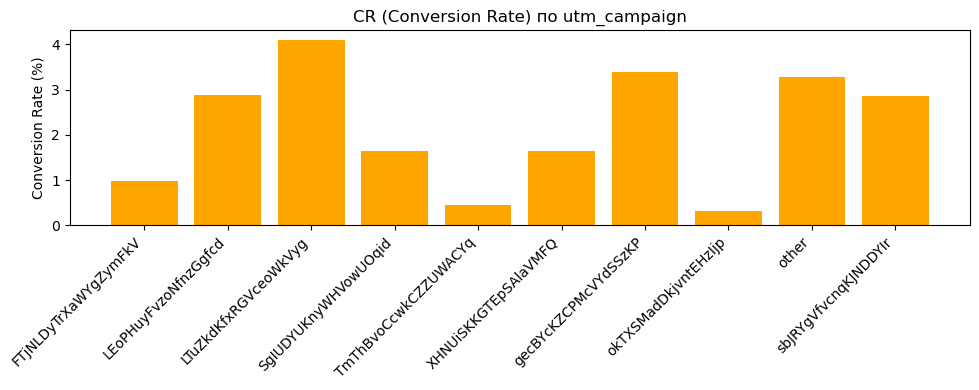

Точные значения CR для utm_campaign:
  FTjNLDyTrXaWYgZymFkV: 0.989% (0.99%)
  LEoPHuyFvzoNfnzGgfcd: 2.885% (2.88%)
  LTuZkdKfxRGVceoWkVyg: 4.101% (4.10%)
  SgIUDYUKnyWHVowUOqid: 1.633% (1.63%)
  TmThBvoCcwkCZZUWACYq: 0.462% (0.46%)
  XHNUiSKKGTEpSAlaVMFQ: 1.635% (1.64%)
  gecBYcKZCPMcVYdSSzKP: 3.391% (3.39%)
  okTXSMadDkjvntEHzIjp: 0.314% (0.31%)
  other: 3.267% (3.27%)
  sbJRYgVfvcnqKJNDDYIr: 2.848% (2.85%)


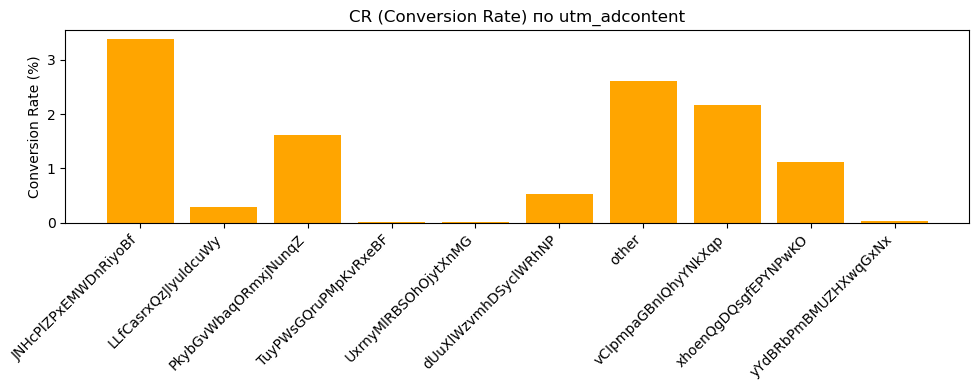

Точные значения CR для utm_adcontent:
  JNHcPlZPxEMWDnRiyoBf: 3.374% (3.37%)
  LLfCasrxQzJIyuldcuWy: 0.297% (0.30%)
  PkybGvWbaqORmxjNunqZ: 1.621% (1.62%)
  TuyPWsGQruPMpKvRxeBF: 0.011% (0.01%)
  UxrnyMlRBSOhOjytXnMG: 0.015% (0.01%)
  dUuXlWzvmhDSyclWRhNP: 0.535% (0.54%)
  other: 2.608% (2.61%)
  vCIpmpaGBnIQhyYNkXqp: 2.160% (2.16%)
  xhoenQgDQsgfEPYNPwKO: 1.125% (1.12%)
  yYdBRbPmBMUZHXwqGxNx: 0.041% (0.04%)


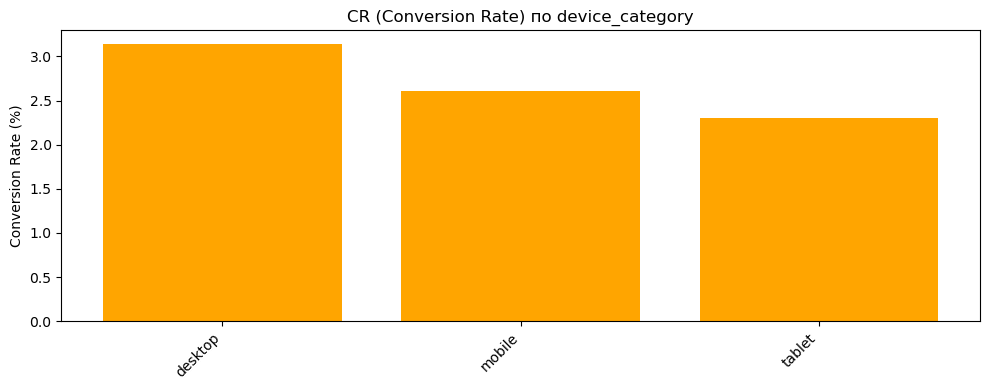

Точные значения CR для device_category:
  desktop: 3.138% (3.14%)
  mobile: 2.602% (2.60%)
  tablet: 2.305% (2.31%)


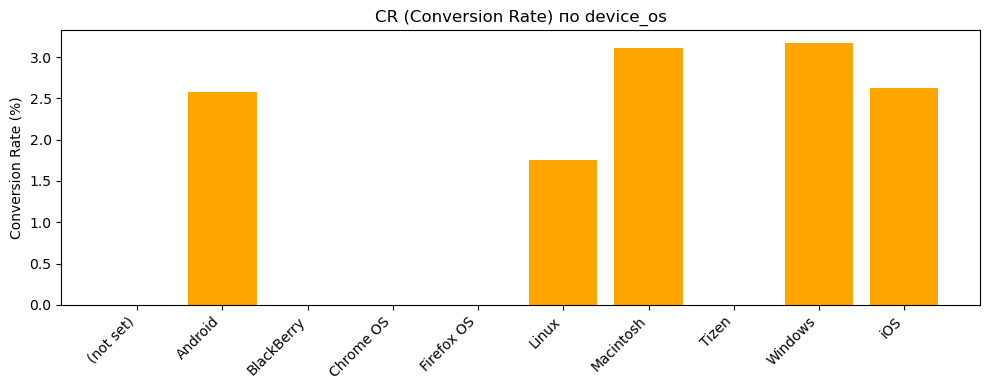

Точные значения CR для device_os:
  (not set): 0.000% (0.00%)
  Android: 2.583% (2.58%)
  BlackBerry: 0.000% (0.00%)
  Chrome OS: 0.000% (0.00%)
  Firefox OS: 0.000% (0.00%)
  Linux: 1.758% (1.76%)
  Macintosh: 3.110% (3.11%)
  Tizen: 0.000% (0.00%)
  Windows: 3.166% (3.17%)
  iOS: 2.625% (2.63%)


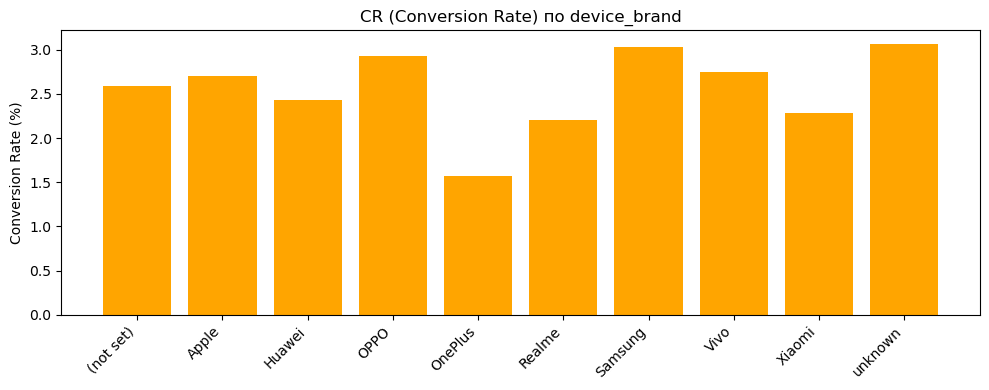

Точные значения CR для device_brand:
  (not set): 2.588% (2.59%)
  Apple: 2.701% (2.70%)
  Huawei: 2.431% (2.43%)
  OPPO: 2.932% (2.93%)
  OnePlus: 1.576% (1.58%)
  Realme: 2.209% (2.21%)
  Samsung: 3.025% (3.03%)
  Vivo: 2.743% (2.74%)
  Xiaomi: 2.286% (2.29%)
  unknown: 3.064% (3.06%)


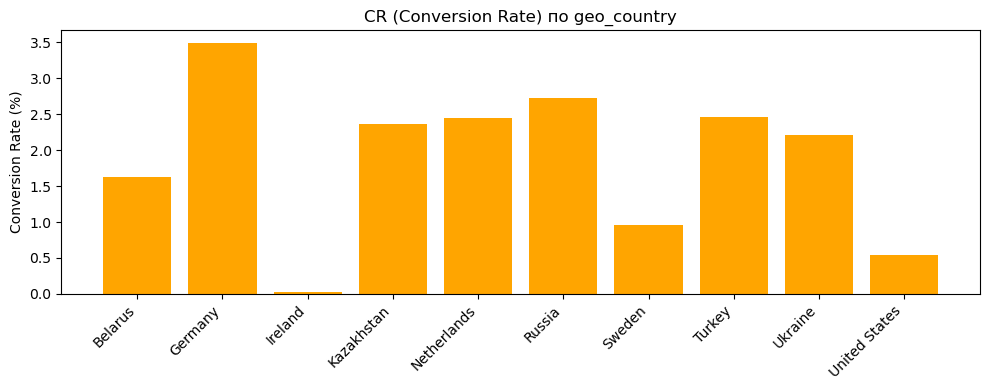

Точные значения CR для geo_country:
  Belarus: 1.623% (1.62%)
  Germany: 3.495% (3.49%)
  Ireland: 0.025% (0.02%)
  Kazakhstan: 2.369% (2.37%)
  Netherlands: 2.453% (2.45%)
  Russia: 2.730% (2.73%)
  Sweden: 0.965% (0.97%)
  Turkey: 2.458% (2.46%)
  Ukraine: 2.208% (2.21%)
  United States: 0.543% (0.54%)


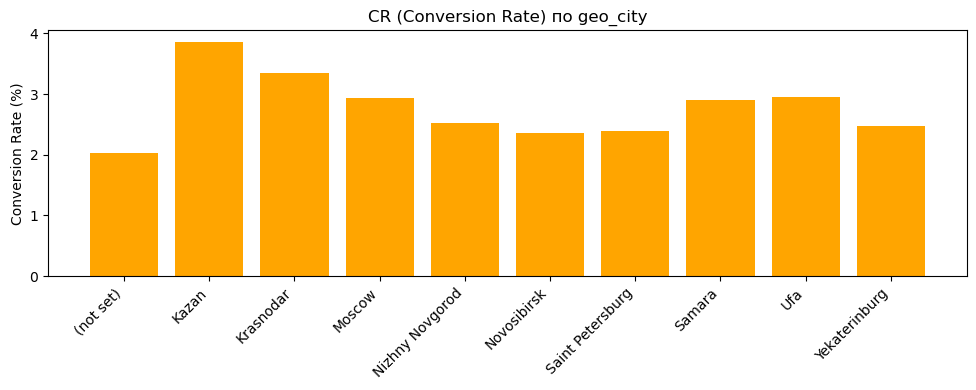

Точные значения CR для geo_city:
  (not set): 2.031% (2.03%)
  Kazan: 3.857% (3.86%)
  Krasnodar: 3.353% (3.35%)
  Moscow: 2.934% (2.93%)
  Nizhny Novgorod: 2.515% (2.51%)
  Novosibirsk: 2.360% (2.36%)
  Saint Petersburg: 2.397% (2.40%)
  Samara: 2.909% (2.91%)
  Ufa: 2.948% (2.95%)
  Yekaterinburg: 2.478% (2.48%)


In [68]:
for col in key_features:
    # Топ-10 значений по частоте
    top_cats = ml_data[col].value_counts().head(10).index
    
    # Считаем CR = среднее target по категории
    cr_by_cat = ml_data[ml_data[col].isin(top_cats)].groupby(col)['target'].mean()
    
    plt.figure(figsize=(10, 4))
    plt.bar(cr_by_cat.index, cr_by_cat.values * 100, color='orange')  # Умножаем на 100 для %
    plt.title(f'CR (Conversion Rate) по {col}')
    plt.ylabel('Conversion Rate (%)') 
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()
    plt.show()
    
    # Выводим точные цифры
    print(f"Точные значения CR для {col}:")
    for category, cr_value in cr_by_cat.items():
        print(f"  {category}: {cr_value:.3%} ({cr_value*100:.2f}%)")

#### 2.3.3. Динамика визитов и событий во времени

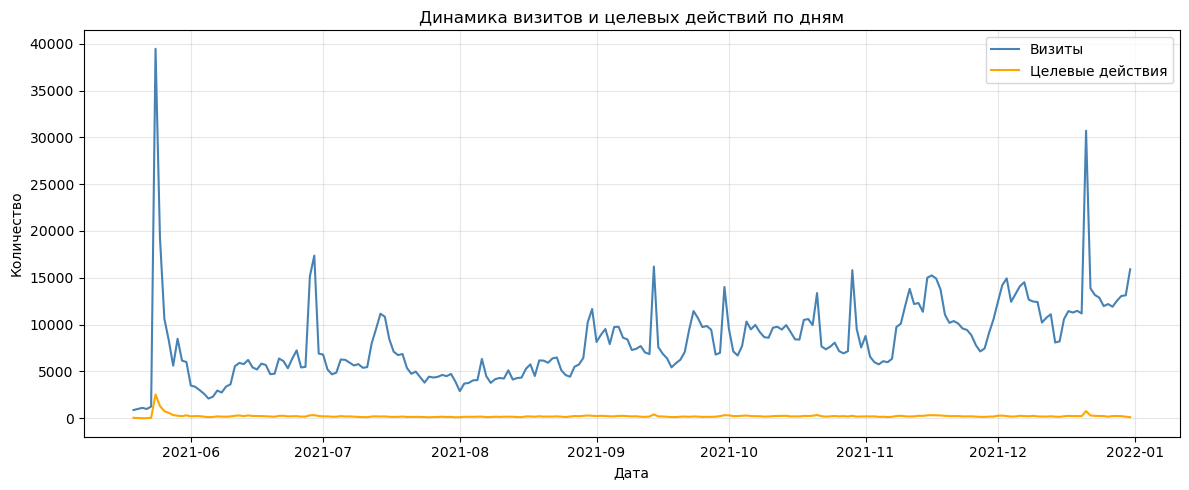

СТАТИСТИКА ПО ДИНАМИКЕ:
 Всего дней: 226
 Среднее визитов в день: 8230
 Среднее целевых событий в день: 223
 Средняя конверсия (CR): 0.029 (2.9%)


In [69]:
# Динамика визитов и целевых событий по дням 

import matplotlib.pyplot as plt

# Группируем по дате
daily_data = ml_data.groupby(ml_data['visit_date'].dt.date).agg(
    visits=('session_id', 'count'),
    events=('target', 'sum')
)

# Считаем конверсию
daily_data['conversion_rate'] = daily_data['events'] / daily_data['visits']

# Строим график
plt.figure(figsize=(12, 5))
plt.plot(daily_data.index, daily_data['visits'], label='Визиты', color='steelblue')
plt.plot(daily_data.index, daily_data['events'], label='Целевые действия', color='orange')
plt.title('Динамика визитов и целевых действий по дням')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Статистика по динамике
print("СТАТИСТИКА ПО ДИНАМИКЕ:")
print(f" Всего дней: {len(daily_data)}")
print(f" Среднее визитов в день: {daily_data['visits'].mean():.0f}")
print(f" Среднее целевых событий в день: {daily_data['events'].mean():.0f}")
print(f" Средняя конверсия (CR): {daily_data['conversion_rate'].mean():.3f} ({daily_data['conversion_rate'].mean() * 100:.1f}%)")

#### 2.3.4. Анализ признака visit_number

In [70]:
# Зависимость Conversion Rate от номера визита в процентах
cr_by_visit = ml_data.groupby('visit_number')['target'].mean().head(10)
print(cr_by_visit)

visit_number
1     0.023516
2     0.032293
3     0.037586
4     0.043945
5     0.044250
6     0.048504
7     0.045533
8     0.045220
9     0.046922
10    0.047478
Name: target, dtype: float64


In [71]:
# Корреляция 
corr = ml_data['visit_number'].corr(ml_data['target'])
print(f"Корреляция visit_number и target: {corr:.3f}")

Корреляция visit_number и target: 0.025


In [72]:
# Матрица корреляции
matrix = [[1, corr], [corr, 1]]

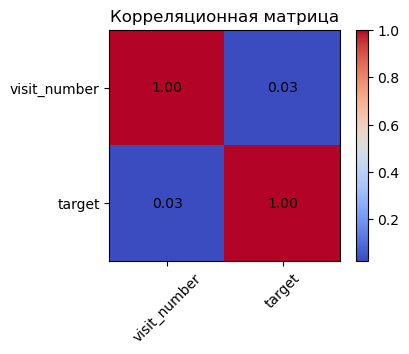

Вывод: слабая положительная связь


In [73]:
plt.figure(figsize=(4, 3))
plt.imshow(matrix, cmap='coolwarm')

for i in range(2):
    for j in range(2):
        plt.text(j, i, f"{matrix[i][j]:.2f}", ha='center', va='center', color='black')

plt.xticks([0, 1], ["visit_number", "target"], rotation=45)
plt.yticks([0, 1], ["visit_number", "target"])
plt.colorbar()
plt.title("Корреляционная матрица")
plt.show()

print(f"Вывод: слабая положительная связь")

1. Между `visit_number` и `target` наблюдается слабая положительная связь (корреляция = 0.025).
2. CR растёт с увеличением номера визита: 
   - 1-й визит: 2.35%
   - 10-й визит: 4.75%
3. Это означает, что вернувшиеся пользователи конвертируются чаще, 
   но эффект незначителен для модели.

#### 2.3.5. Выводы по полученным связям

1. **Источник трафика (utm_source)**:
   - Наибольший CR наблюдается у источников: 
     'aXQzDWsJuGXeBXexNHjc' (5.87%), 'bByPQxmDaMXgpHeypKSM' (5.43%).

2. **Тип трафика (utm_medium)**:
   - Referral трафик даёт самый высокий CR (5.38%),
     органический - 3.33%, платный (cpc, banner) - 2.19-2.74%.

3. **Тип устройства (device_category)**:
   - Пользователи с desktop конвертируются чаще (3.14%), чем с mobile (2.60%).

4. **Операционная система (device_os)**:
   - Windows показывает самый высокий CR (3.17%),
     Macintosh - 3.11%, Android - 2.58%.

5. **География (geo_city)**:
   - В Казани самый высокий CR (3.86%),
     Москва - 2.93%, Санкт-Петербург - 2.40%.

6. **Бренд устройства (device_brand)**:
   - Samsung показывает лучший CR (3.03%),
     Apple - 2.70%, Xiaomi - 2.29%.

7. **Номер визита (visit_number)**:
   - CR растёт с увеличением номера визита:
     - 1-й визит: 2.35%
     - 10-й визит: 4.75%

**Общий вывод**:  
Наиболее целевой трафик идёт из referral-источников, с десктопов на Windows,
из Казани и от пользователей Samsung. Вернувшиеся пользователи конвертируются чаще новых.

## 3. Feature engineering

### 3.1. Создание новых признаков

#### 3.1.1. Временные признаки из даты и времени

In [74]:
# Извлекаем часы из timedelta
ml_data['visit_hour'] = ml_data['visit_time'].dt.components.hours

In [75]:
# Извлекаем месяц из даты (1=январь, 12=декабрь)  
ml_data['visit_month'] = ml_data['visit_date'].dt.month

In [76]:
# Выделяем день недели
ml_data['visit_day_of_week'] = ml_data['visit_date'].dt.dayofweek

In [77]:
# Создаем признак "выходной" (1 если суббота или воскресенье)
ml_data['is_weekend'] = (ml_data['visit_day_of_week'] >= 5).astype(int)

In [78]:
# Создаем признак рабочего времени
ml_data['is_working_hours'] = ((ml_data['visit_hour'] >= 9) & (ml_data['visit_hour'] <= 18)).astype(int)

#### 3.1.2. Признаки из трафика

In [79]:
# Органический трафик
ml_data['is_organic'] = ml_data['utm_medium'].isin(['organic', 'referral', '(none)']).astype(int)

In [80]:
# Трафик из социальных сетей
social_sources = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 
                  'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']
ml_data['is_social'] = ml_data['utm_source'].isin(social_sources).astype(int)

#### 3.1.3. Географические признаки 

In [81]:
# Берем топ-20 самых популярных городов
top_20_cities = ml_data['geo_city'].value_counts().head(20).index
print(f"Топ-20 городов покрывают {ml_data['geo_city'].isin(top_20_cities).mean()*100:.1f}% данных")

# Создаем бинарные признаки для каждого топ-города
for city in top_20_cities:
     ml_data[f'geo_city_{city}'] = (ml_data['geo_city'] == city).astype(int)

# Создаем признак "other" для всех остальных городов
ml_data['geo_city_other'] = (~ml_data['geo_city'].isin(top_20_cities)).astype(int)

Топ-20 городов покрывают 80.9% данных


In [82]:
# Анализируем топ страны по количеству визитов
country_stats = ml_data['geo_country'].value_counts()
top_countries = country_stats.head(10).index.tolist()
print(f"Топ-10 стран: {top_countries}")

Топ-10 стран: ['Russia', 'United States', 'Ukraine', 'Ireland', 'Belarus', 'Sweden', 'Kazakhstan', 'Germany', 'Turkey', 'Netherlands']


In [83]:
# Создаем фичи для каждой топ-страны
for country in top_countries:
     ml_data[f'geo_country_{country.lower()}'] = (ml_data['geo_country'] == country).astype(int)

#### 3.1.4. Фичи лояльности

In [84]:
# Бинарный признак - новый vs возвращающийся пользователь
ml_data['is_returning_user'] = (ml_data['visit_number'] > 1).astype(int)

In [85]:
# Группы лояльности (основные сегменты)
ml_data['user_loyalty'] = pd.cut(ml_data['visit_number'], 
                               bins=[0, 1, 3, 10, 600],
                               labels=['new', 'returning', 'active', 'loyal'])

In [86]:
# Проверяем is_returning_user
returning_cr = ml_data.groupby('is_returning_user')['target'].mean()
print(f"is_returning_user:")
print(f"  Новые пользователи (0): {returning_cr[0]:.3%}")
print(f"  Возвращающиеся (1): {returning_cr[1]:.3%}")
print(f"  Разница: {abs(returning_cr[1] - returning_cr[0]):.3%}")

is_returning_user:
  Новые пользователи (0): 2.352%
  Возвращающиеся (1): 3.711%
  Разница: 1.359%


In [87]:
# Проверяем user_loyalty
loyalty_cr = ml_data.groupby('user_loyalty')['target'].mean()
print(f"\nuser_loyalty:")
for group, cr in loyalty_cr.items():
    print(f"  {group}: {cr:.3%}")


user_loyalty:
  new: 2.352%
  returning: 3.365%
  active: 4.526%
  loyal: 4.015%


C:\Users\user\AppData\Local\Temp\ipykernel_15348\270375742.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loyalty_cr = ml_data.groupby('user_loyalty')['target'].mean()


#### 3.1.5. Преобразование разрешения экрана в числовой признак

In [88]:
def resolution_to_area(resolution_str):
  
    if pd.isna(resolution_str) or resolution_str == '(not set)':
        return 0
    try:
        parts = str(resolution_str).split('x')
        width = int(parts[0])
        height = int(parts[1])
        return width * height
    except:
        return 0

ml_data['screen_area'] = ml_data['device_screen_resolution'].apply(resolution_to_area)

In [89]:
all_original_columns = ['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
                       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 
                       'device_category', 'device_os', 'device_brand', 'device_model',
                       'device_screen_resolution', 'device_browser', 'geo_country', 
                       'geo_city', 'target']

new_features = [col for col in ml_data.columns if col not in all_original_columns]

print(f"Всего создано фич: {len(new_features)}")

Всего создано фич: 41


#### Стратифицированная выборка

In [90]:
# Берем стратифицированную выборку 100K строк
from sklearn.model_selection import train_test_split

_, ml_data = train_test_split(
    ml_data,
    test_size=100000,
    stratify=ml_data['target'],
    random_state=42
)

print(f"Стратифицированная выборка: {len(ml_data)} строк")
print(f"Пропорция target: {ml_data['target'].mean():.3%}")


Стратифицированная выборка: 100000 строк
Пропорция target: 2.705%


#### 3.1.6. One-Hot Encoding категориальных признаков

In [91]:
# формируем список категориальных признаков для кодирования
categorical_columns = ['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 'device_category', 'device_os', 'device_brand','device_browser', 'user_loyalty'] 

# анализируем каждый признак
for column in categorical_columns:
    unique_count = ml_data[column].nunique()
    print(f"{column}: {unique_count}")

utm_source: 125
utm_medium: 36
utm_campaign: 298
utm_adcontent: 166
device_category: 3
device_os: 8
device_brand: 99
device_browser: 34
user_loyalty: 4


In [92]:
data = ml_data[categorical_columns]
data.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_browser,user_loyalty
1085358,kjsLglQLzykiRbcDiGcD,cpc,jvsVVQVKRfBIqBDBuCkq,other,mobile,Android,Xiaomi,Chrome,new
721345,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Xiaomi,Chrome,new
1560993,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,Android,OnePlus,Chrome,returning
1702908,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Xiaomi,Chrome,new
184116,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Vivo,Chrome,new


In [93]:
ohe = OneHotEncoder(dtype='int8', sparse_output=False)
ohe

OneHotEncoder(dtype='int8', sparse_output=False)

In [94]:
ohe.fit(data)

OneHotEncoder(dtype='int8', sparse_output=False)

In [95]:
ohe_data = ohe.transform(data)
ohe_data

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int8)

In [96]:
ohe.get_feature_names_out()

array(['utm_source_ArbfvYgWhqxkzywKqpQf',
       'utm_source_BHcvLfOaCWvWTykYqHVe',
       'utm_source_BKeImrJuRDZcHiSSTdzm',
       'utm_source_CFeqZLBNQdYHxJrTOHjY',
       'utm_source_CXgqTLNTvvxWUWoOfjNF',
       'utm_source_CgsxHpdTmXHvrHqEKRxp',
       'utm_source_DfoBrvtzFbohFKcUrmMV',
       'utm_source_DlnuGwaJBHGNEKdWfOpe',
       'utm_source_DnEUulZAecfGPvdtZBYS',
       'utm_source_DnxUhHWInKVDAWzwROOC',
       'utm_source_DsqwamlMwRgMTyspCjFR',
       'utm_source_EvhrtRzIJnQYHziPiLzV',
       'utm_source_FTAuYVNoYYxgvKMpKSLW',
       'utm_source_GWZGdHKPgmZPNPwkJshU',
       'utm_source_GbuDbHhyctlqNtNRnebC',
       'utm_source_GkGprIZHXAKqgsyDIvMR',
       'utm_source_GmILPdZyuAVJCPsUBHeN',
       'utm_source_GpAkIXsclxDGyILfNlrR',
       'utm_source_HFaOtpcChAlcMuxEAlpu',
       'utm_source_HVQdipMDpgJKXAzecwqn',
       'utm_source_HbolMJUevblAbkHClEQa',
       'utm_source_IRGUHqwEMepMjgCYBVRn',
       'utm_source_ISrKoXQCxqqYvAZICvjs',
       'utm_source_IZEXUFLARCUMynm

### 3.1.6. Стандартизация для числовых признаков

In [97]:
numerical_data = ml_data[['visit_number', 'screen_area']].copy()

In [98]:
std_scaler = StandardScaler()
std_scaler

StandardScaler()

In [99]:
std_scaler_data = std_scaler.fit_transform(numerical_data)

In [100]:
ml_data[['visit_number', 'screen_area']] = std_scaler_data

#### 3.1.7. Корреляционный анализ числовых признаков

In [101]:
features = ['visit_number', 'screen_area', 'visit_hour', 'visit_month', 'visit_day_of_week']

# 1. Корреляция между признаками
corr_matrix = ml_data[features].corr().round(3)
print("Связь между признаками:")
print(corr_matrix)

# 2. Корреляция с target  
target_corr = ml_data[features + ['target']].corr()['target'].drop('target')
print("\nВлияние на конверсию:")
print(target_corr.round(3))

Связь между признаками:
                   visit_number  screen_area  visit_hour  visit_month  \
visit_number              1.000        0.097       0.006        0.010   
screen_area               0.097        1.000      -0.007       -0.092   
visit_hour                0.006       -0.007       1.000        0.027   
visit_month               0.010       -0.092       0.027        1.000   
visit_day_of_week        -0.011       -0.073      -0.024        0.090   

                   visit_day_of_week  
visit_number                  -0.011  
screen_area                   -0.073  
visit_hour                    -0.024  
visit_month                    0.090  
visit_day_of_week              1.000  

Влияние на конверсию:
visit_number         0.033
screen_area          0.005
visit_hour           0.003
visit_month         -0.052
visit_day_of_week   -0.011
Name: target, dtype: float64


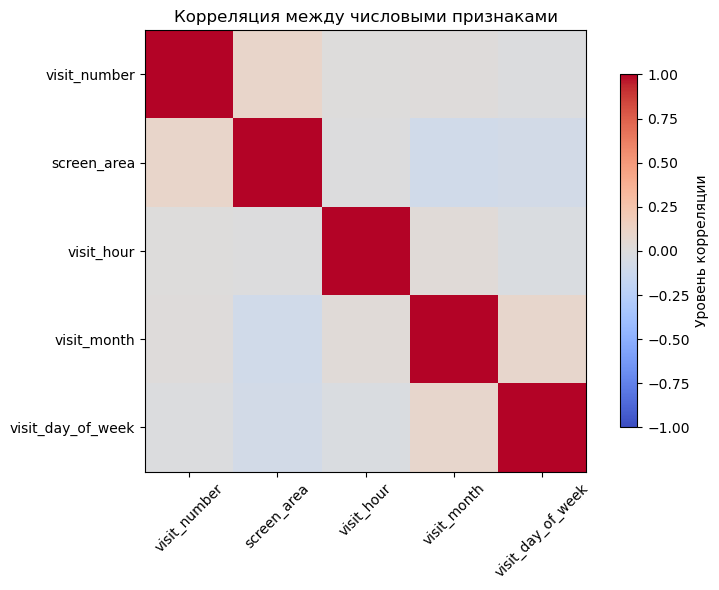

In [102]:
# heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix.values, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(shrink=0.8, label='Уровень корреляции')
plt.xticks(range(len(features)), features, rotation=45)
plt.yticks(range(len(features)), features)
plt.title("Корреляция между числовыми признаками")
plt.tight_layout()
plt.show()

Выводы по корреляционному анализу:
- Сильной линейной зависимости между признаками не обнаружено
- Числовые признаки слабо влияют на конверсию  
- Мультиколлинеарность отсутствует

### 3.2. Добавляем преобразованные признаки в исходный датафрейм и удаляем ненужные 

In [103]:
# Преобразуем в DataFrame 
ohe_df = pd.DataFrame(
    ohe_data, 
    columns=ohe.get_feature_names_out(),
    index=ml_data.index
)

# Объединяем
ml_data = pd.concat([ml_data, ohe_df], axis=1)

print(f" Добавлено {len(ohe_df.columns)} OHE-признаков")

 Добавлено 773 OHE-признаков


In [104]:
ml_data.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,device_browser_Safari (in-app),device_browser_Samsung Internet,device_browser_UC Browser,device_browser_YaBrowser,device_browser_[FBAN,device_browser_helloworld,user_loyalty_active,user_loyalty_loyal,user_loyalty_new,user_loyalty_returning
1085358,5602816162462541485.1634051758.1634051758,1304507293.163405,2021-10-12 00:00:00+00:00,0 days 18:00:00,-0.144811,kjsLglQLzykiRbcDiGcD,cpc,jvsVVQVKRfBIqBDBuCkq,other,mobile,...,0,0,0,0,0,0,0,0,1,0
721345,3981460549322919844.1637863383.1637863383,927006022.163786,2021-11-25 00:00:00+00:00,0 days 21:03:03,-0.144811,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,0,0,0,0,0,0,0,0,1,0
1560993,7719870461090954326.1633385598.1633385598,1797422408.163338,2021-10-05 00:00:00+00:00,0 days 01:00:00,-0.058631,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,...,0,0,0,0,0,0,0,0,0,1
1702908,8356914699227592877.1639151793.1639151793,1945745828.163915,2021-12-10 00:00:00+00:00,0 days 18:56:33,-0.144811,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,0,0,0,0,0,0,0,0,1,0
184116,1578367407377691376.1640837876.1640837876,367492299.164084,2021-12-30 00:00:00+00:00,0 days 07:17:56,-0.144811,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,0,0,0,0,0,0,0,0,1,0


In [105]:
# Столбцы которые нужно удалить
columns_to_drop = [
    'session_id', 'client_id',
    'visit_date', 'visit_time',
    'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
    'device_category', 'device_os', 'device_brand', 'device_browser',
    'user_loyalty',
    'geo_city', 'geo_country',
    'device_screen_resolution'
]

In [106]:
# Удаляем признаки
ml_final = ml_data.drop(columns=columns_to_drop)

In [107]:
ml_final

,visit_number,target,visit_hour,visit_month,visit_day_of_week,is_weekend,is_working_hours,is_organic,is_social,geo_city_Moscow,...,device_browser_Safari (in-app),device_browser_Samsung Internet,device_browser_UC Browser,device_browser_YaBrowser,device_browser_[FBAN,device_browser_helloworld,user_loyalty_active,user_loyalty_loyal,user_loyalty_new,user_loyalty_returning
1085358,-0.144811,0,18,10,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
721345,-0.144811,0,21,11,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1560993,-0.058631,0,1,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1702908,-0.144811,0,18,12,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
184116,-0.144811,0,7,12,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322413,-0.144811,0,10,11,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1421923,-0.058631,0,17,12,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32489,-0.144811,0,15,8,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
492592,-0.144811,0,22,11,6,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


## 4. Modeling

### 4.1. Разделяем признаки

In [108]:
# Разделяем на признаки и целевую переменную
X = ml_final.drop('target', axis=1)
y = ml_final['target']

In [109]:
# Разделяем на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  
)

### 4.2. Инициализация моделей

In [110]:
models = {
    'LogisticRegression': LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000,solver='liblinear'),
    'RandomForest': RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
}

### 4.3. Обучение моделей

In [111]:
results = {}
for name, model in models.items():
    print(f"\nОбучение {name}...")
    model.fit(X_train, y_train)
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    results[name] = roc_auc
    
    print(f"{name}: ROC-AUC = {roc_auc:.4f}")


Обучение LogisticRegression...
LogisticRegression: ROC-AUC = 0.6906

Обучение RandomForest...
RandomForest: ROC-AUC = 0.6072


### 4.4.Выбираем лучшую модель

In [112]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\n Лучшая модель: {best_model_name} (ROC-AUC = {results[best_model_name]:.4f})")


 Лучшая модель: LogisticRegression (ROC-AUC = 0.6906)


### 4.5. Матрица ошибок

In [113]:
# Бинарные предсказания (с порогом 0.5)
y_pred = best_model.predict(X_test)

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:")
print(cm)

# Classification Report (точность, полнота, F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Матрица ошибок:
[[11726  7733]
 [  192   349]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.60      0.75     19459
           1       0.04      0.65      0.08       541

    accuracy                           0.60     20000
   macro avg       0.51      0.62      0.41     20000
weighted avg       0.96      0.60      0.73     20000



### 4.6. Анализ важности признаков


 Топ-10 важных признаков (агрегированные):
   original_feature  importance
14     utm_campaign  195.837809
16       utm_source   74.919658
13    utm_adcontent   71.768371
0      device_brand   50.509089
15       utm_medium   15.094841
5       geo_country   10.068566
1    device_browser    9.641047
4          geo_city    5.737328
3         device_os    2.444756
12     user_loyalty    1.878083


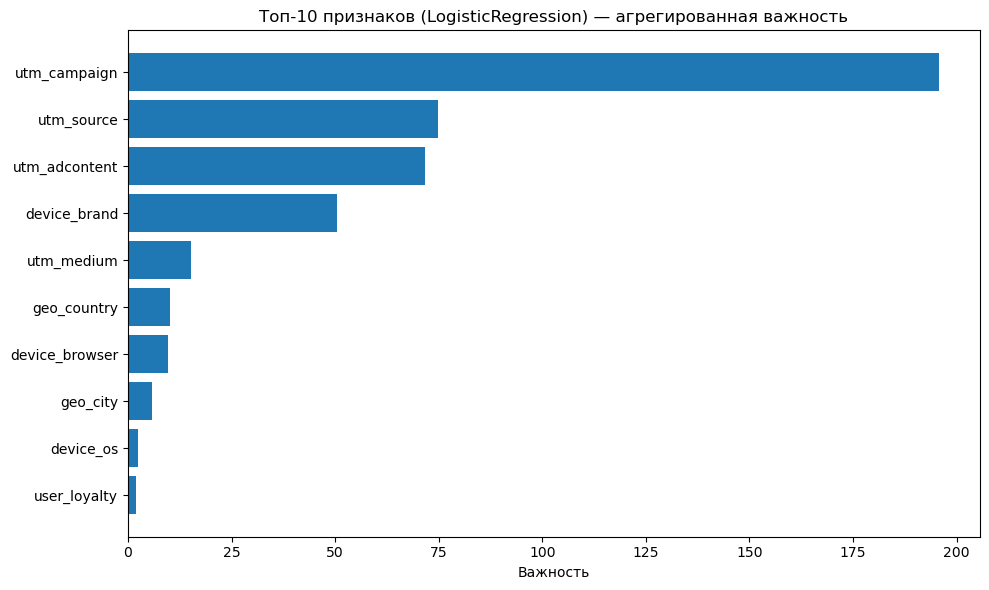

In [114]:
if hasattr(best_model, 'coef_'):
    importance_raw = pd.DataFrame({
        'feature': X.columns,
        'importance': np.abs(best_model.coef_[0])
    })
elif hasattr(best_model, 'feature_importances_'):
    importance_raw = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    })


def map_to_original(feature_name):
    original_cats = [
        'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
        'device_category', 'device_os', 'device_brand', 'device_browser',
        'user_loyalty',
        'geo_city',      
        'geo_country'   
    ]
    for base in original_cats:
        if feature_name.startswith(base + '_'):
            return base
    return feature_name

importance_raw['original_feature'] = importance_raw['feature'].apply(map_to_original)

# Агрегируем важность (сумма для категориальных, без изменений для числовых)
importance_agg = importance_raw.groupby('original_feature')['importance'].sum().reset_index()
importance_agg = importance_agg.sort_values('importance', ascending=False)

# Выводим топ-10
print("\n Топ-10 важных признаков (агрегированные):")
print(importance_agg.head(10))

# График
plt.figure(figsize=(10, 6))
plt.barh(importance_agg.head(10)['original_feature'], importance_agg.head(10)['importance'])
plt.gca().invert_yaxis()  
plt.title(f'Топ-10 признаков ({best_model_name}) — агрегированная важность')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

### 4.7. ROC-кривая

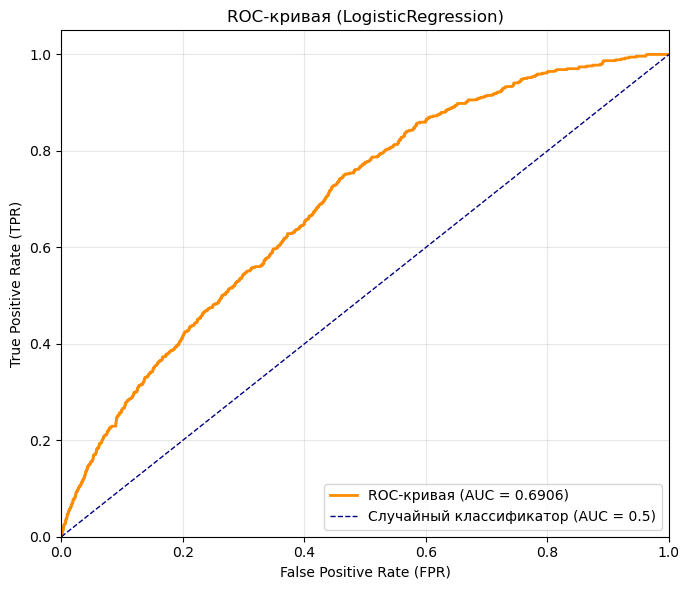

In [115]:
# Получаем вероятности для лучшей модели
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
roc_auc_best = results[best_model_name]

# Строим график
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-кривая (AUC = {roc_auc_best:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Случайный классификатор (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'ROC-кривая ({best_model_name})')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Итоговый вывод по результатам анализа

### 1. Результаты моделирования

Для прогнозирования целевых действий клиентов были обучены и протестированы две модели:

- **Logistic Regression** с балансировкой классов → **ROC-AUC = 0.6906**
- **Random Forest** с балансировкой классов (100 деревьев) → **ROC-AUC = 0.6072**

**Лучшая модель**: Logistic Regression, показавшая значительно более высокое качество предсказаний.

### 2. Методология оценки качества

**Процесс оценки моделей:**

- Основная метрика: **ROC-AUC** (рекомендована для несбалансированных данных)
- Данные: стратифицированная выборка 100 000 строк (80% обучение / 20% тест), **доля конверсии в выборках соответствует исходной - 2.7%**
- Обе модели обучены с параметром `class_weight='balanced'` для учета дисбаланса классов
- Для прогнозирования использовался метод `predict_proba()`, который возвращает вероятности принадлежности к классу 1 (совершение целевого действия)
- На основе вероятностных предсказаний рассчитан ROC-AUC с использованием `roc_auc_score(y_test, y_pred_proba)`
- Для определения оптимального порога классификации построена ROC-кривая, которая подтвердила, что модель превосходит случайный классификатор (AUC = 0.5)

### 3. Ключевые выводы и бизнес-инсайты

**На основе анализа важности признаков в модели выявлены ключевые факторы конверсии:**

**1. Рекламные кампании (utm_campaign) - наиболее влиятельный фактор**
- Важность в модели: 195.84
- Высококонвертируемые кампании: LTuZkdKfxRGVceoWkVyg (4.10%), gecBYcKZCPMcVYdSSzKP (3.39%)

**2. Источники трафика (utm_source) - второй по значимости фактор**
- Важность в модели: 74.92
- Наиболее эффективные источники: aXQzDWsJuGXeBXexNHjc (5.87%), bByPQxmDaMXgpHeypKSM (5.43%)

**3. Рекламный контент (utm_adcontent) - третий по важности фактор**
- Важность в модели: 71.77
- Лучший контент: JNHcPlZPxEMWDnRiyoBf (3.37%)

**4. Бренды устройств (device_brand) - четвертый по влиянию фактор**
- Важность в модели: 50.51
- Лидирующие бренды: Samsung (3.03%), unknown (3.06%), OPPO (2.93%)

**Дополнительные значимые инсайты:**
- **География** - Казань лидирует с конверсией 3.86%, Москва показывает 2.93%
- **Лояльность** - возвращающиеся пользователи демонстрируют рост конверсии с 2.35% до 4.75%

**"Модель основывает прогнозы на понятных бизнес-факторах: самые важные признаки связаны с рекламными кампаниями и источниками трафика"**